In [8]:
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns;import pandas as pd;import numpy as np
_rc = {'figure.figsize':[1.,0.6]}
sns.set_context('paper',rc=_rc)

## Chapter1. 贝叶斯哲学

### 1.1 贝叶斯思维

#### 一. 贝叶斯学派与频率学派
1. `贝叶斯学派`的世界观 :   
 "概率"是我们对一件事情发生的相信程度  
2. `频率学派`的世界观 :  
 "概率"是事件在长时间内发生的频率. 对于没有长期频率的事件, 就无法对此估计概率  
3. 比如总统选举, 该人选举成功的概率, 由于选举只进行一次, 所以无法通过频率估计. 但在贝叶斯学派看来, 这个概率代表你与多相信这个人能选举成功

#### 二. 贝叶斯观点
1. 将一件事情发生的信心, 等同于事件发生的概率是符合人类直觉的. 相比频率学派的观点, 则需要后天训练得来
2. 贝叶斯的术语  
  1. 为了与传统概率论的术语对齐,我们把对事件$A$发生的信念计做$P(A)$, 并称之为先验概率  
  2. 随着时间的推移, 某些事情的发生可能会改变我们的信念, 于是把这个改变后的信念计做$P(A|X)$, 称为后验概率.  
 而且我们发现, 即便随着时间的推移, 某些事情的发生证明我们的初始信念是错的, 但我们仍没有抛弃这些原始信念. 只是在"证据"到来时, 不断修正我们的信念, 使其错的不那么离谱.
  3. 贝叶斯的模糊回答  
   频率推断返回统计量的1个估计值. 而贝叶斯推断, 总是返回1个概率值, 表示所有可能估计值的概率.  
   如问"程序有bug吗", 频率推断回答没有!而贝叶斯推断回答,"有"的概率20%, 没有的概率80%!
 
#### 三. 贝叶斯学派加入证据
1. 贝叶斯学派, 正是不断用证据来修正我们的信念, 来达到更为贴近事实的结果
2. 若用$N$表示"证据"的数量, 当$N$足够大的时候, 贝叶斯学派和频率学派的结果往往相差不大. 但当$N$不是很大时, 由于小样本的不稳定性, 频率学派的统计值往往偏差较大, 而贝叶斯学派保留了这种不确定性





### 1.2 贝叶斯框架

#### 一. 贝叶斯定理
$p\left( \theta |x \right) =\frac { p\left( x|\theta  \right) *p\left( \theta  \right)  }{ p\left( x \right)  } \\ \quad \quad =\frac { p\left( x|\theta  \right) *p\left( \theta  \right)  }{ p(x,{ \hat { \theta  }  }_{ 1 })+p(x,{ { \hat { \theta  }  }_{ 2 } })..+p(x,{ { \hat { \theta  }  }_{ n } }) } \quad ({ \hat { \theta  }  }_{ 1 }..{ \hat { \theta  }  }_{ n }为参数\theta 的n个可能取值)\\ \quad \quad =\frac { p\left( x|\theta  \right) *p\left( \theta  \right)  }{ p(x|{ \hat { \theta  }  }_{ 1 })p\left( { \hat { \theta  }  }_{ 1 } \right) +p(x|{ { \hat { \theta  }  }_{ 2 } })p\left( { \hat { \theta  }  }_{ 2 } \right) ..+p(x|{ { \hat { \theta  }  }_{ n } })p\left( { \hat { \theta  }  }_{ n } \right)  } \\ \quad \quad =\frac { p\left( x|\theta  \right) *p\left( \theta  \right)  }{ \sum _{ i=1 }^{ n }{ p(x|{ \hat { \theta  }  }_{ i })p\left( { \hat { \theta  }  }_{ i } \right)  }  } \\ \quad \quad =\frac { p\left( x|\theta  \right) *p\left( \theta  \right)  }{ \int { p\left( x|\theta  \right) *p\left( \theta  \right)  } d\theta  } $

#### 二. 实例: 图书管理员or农民
1. 问题描述:  
 史蒂文是一个"乐于助人,细心,做事有条理"的人.从这个描述看, 史蒂文可能是农民还是图书管理员?  
 已知史蒂文所在区域, 农民数量是图书管理员数量的20倍,且图书管理员中有"乐于助人,细心,做事有条理"特质的占95%, 而农民中有"乐于助人,细心,做事有条理"特质的占52%. 做大上面的问题
2. 计算过程  
 贝叶斯推断中, 由人数得:图书管理员/农民的先验概率为[1/21,1/20].  
 后验概率: $p\left( A=图书管理员|X='细心..有条理 \right) =\frac { p\left( X='细心..有条理'|A=图书管理员 \right) *p\left( A=图书管理员先验 \right)  }{ p\left( x \right)  } \\ \quad \quad \quad \quad \quad \quad =\frac { p\left( X='细心..有条理'|A=图书管理员 \right) *p\left( A=图书管理员先验 \right)  }{ p(X,{ A }_{ 1 })+p(X,{ { A }_{ 2 } }) } \quad \\ \quad \quad \quad \quad \quad \quad =\frac { p\left( X='细心..有条理'|A=图书管理员 \right) *p\left( A=图书管理员先验 \right)  }{ p(X='细心..有条理'|A=图书管理员)p\left( A=图书管理员 \right) +p(X='细心..有条理'|A=农民)p(A=农民) } \\ \quad \quad \quad \quad \quad \quad =\frac { 0.95*\frac { 1 }{ 21 }  }{ 0.95*\frac { 1 }{ 21 } +0.52*\frac { 20 }{ 21 }  } \\ \quad \quad \quad \quad \quad \quad =0.087$

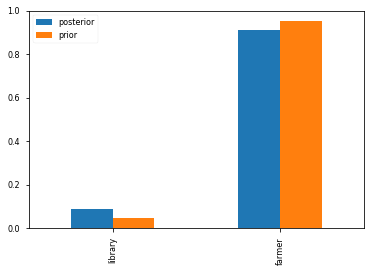

In [2]:
# 图书管理员or农民问题模拟
# 绘图后发现, 图书管理员的后验概率大于先验概率
prior = [1/21.,20/21.]
posterior = [0.087,1-0.087]
df = pd.DataFrame({'prior':prior,'posterior':posterior},index=['library','farmer'])
df.plot.bar()

### 1.3 概率分布

#### 一. 泊松分布
1. 泊松分布作用于离散型随机变量
2. 泊松分布 : $p\left( Z=k \right) =\frac { { \lambda  }^{ k }{ e }^{ -\lambda  } }{ k! } $  
 $\lambda$ 称为泊松分布的强度. $\lambda$越大, 得到大值的概率越大; $\lambda$越小, 得到小值的概率越大   
3. 若变量Z服从泊松质量分布, 则说$Z$ ~ $Poi(\lambda)$  
4. 泊松分布的期望等于他的强度: $E\left( Z|{ \lambda  } \right) ={ \lambda  }$

#### 二. 指数分布
1. 指数分布作用于连续型随机变量
2. 指数分布 : $p\left( Z=z|\lambda  \right) =\lambda { e }^{ -\lambda z }, z\ge 0 $  
3. 若变量Z服从泊松质量分布, 则说$Z$ ~ $Exp(\lambda)$  
4. 泊松分布的期望: $E\left( Z|{ \lambda  } \right) ={ \frac { 1 }{ \lambda  }  }$
5. 指数分布的$\lambda$代表什么  
 现实世界中, 我们不知道$\lambda$的存在, 只能感受到随机变量$Z$的分布.  
 而贝叶斯推断, 围绕着$\lambda$进行取值估计, 随着证据的到来, 不断修正$\lambda$值的分布. 正如修正人们对于$\lambda$值等于n个可能值得信心一样

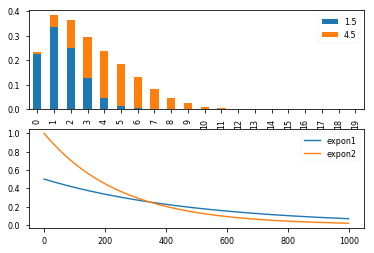

In [3]:
# 分别产生强度为1.5和4.5,变量取值为1到20的泊松分概率值序列.
import scipy.stats as stats
fig,axes = plt.subplots(2,1) # 1行2列
# 泊松分布绘图
a = np.arange(20)
_lambda = [1.5,4.5] # 不同的强度
poisson1 = stats.poisson.pmf(a,_lambda[0]) # 产生强度为1.5,Z依次为1..20的泊松分布
poisson2 = stats.poisson.pmf(a,_lambda[1])
df = pd.DataFrame({'1.5':poisson1,'4.5':poisson2},index = a)
df.plot.bar(stacked=True,ax=axes[0])
# 指数分布绘图
_lambda = [0.5,1]
a = np.linspace(0,4,1000)  
expon1 = stats.expon.pdf(a,scale=1./_lambda[0])
expon2 = stats.expon.pdf(a,scale=1./_lambda[1])
df = pd.DataFrame({'expon1':expon1,'expon2':expon2})
df.plot(ax=axes[1])


### 1.4 程序执行贝叶斯推断


<IPython.core.display.Javascript object>


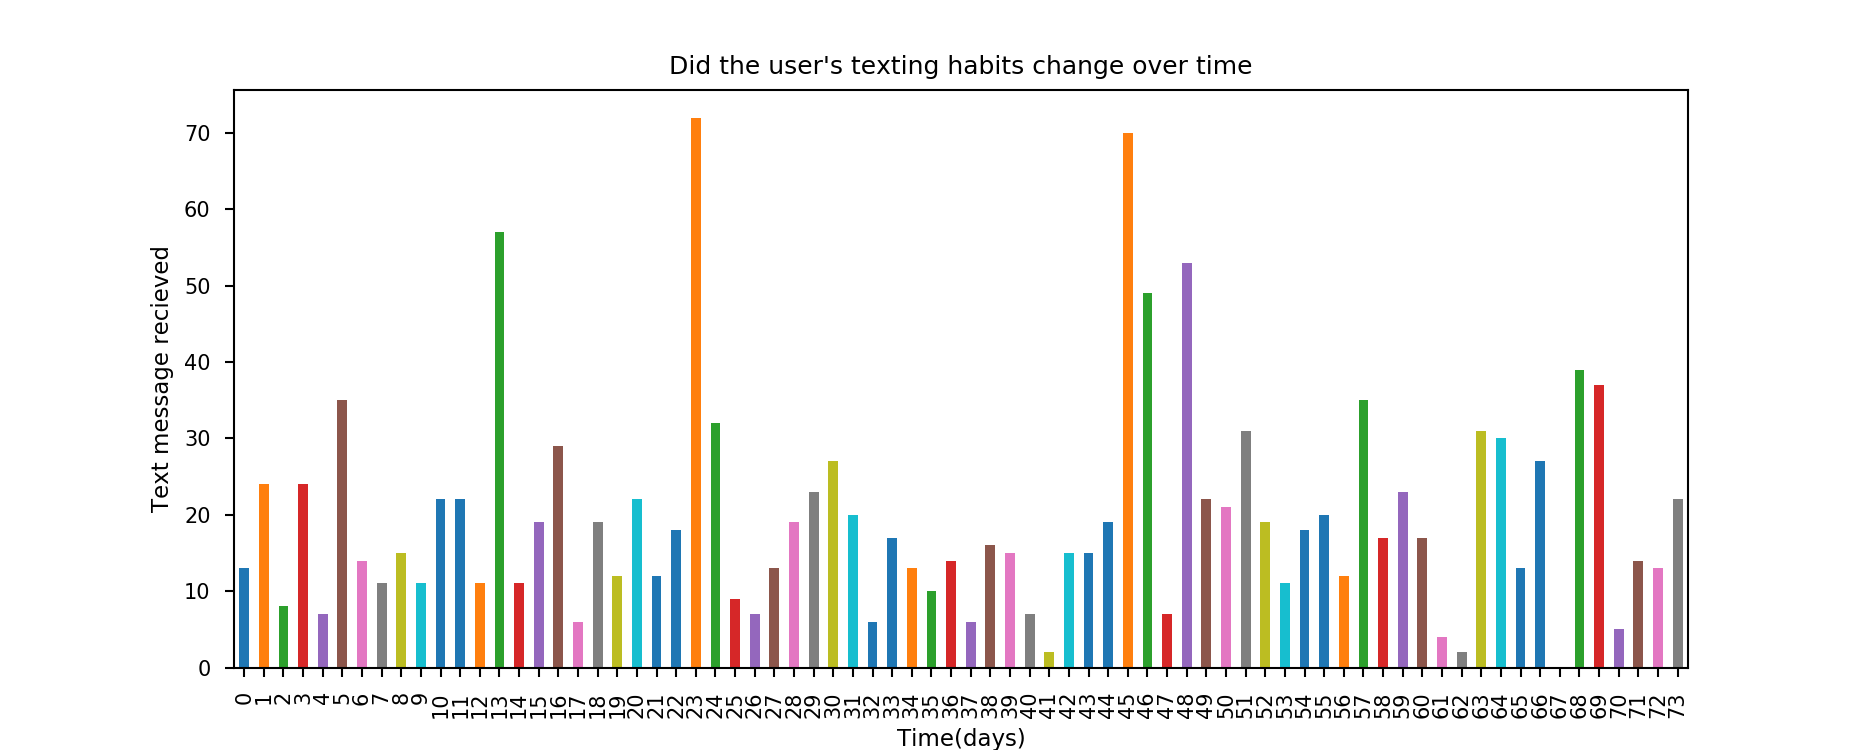

In [26]:
# 该csv只有一列数据
df = pd.read_csv('data/txtdata.csv',header=-1)
f, ax= plt.subplots(figsize = (10 , 4))
obj = df[0]

ax.set_title('Did the user\'s texting habits change over time') # 设置标题
ax.set_xlabel('Time(days)')
ax.set_ylabel('Text message recieved')
obj.plot.bar(ax=ax)
